In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: set of individuals heights and weights, labeled as 'Adult' (1) and 'Child' (0)  
    40 children -> Gaussian([120, 50], [[90,10 ],[10, 40]])  
    120 adults -> Gaussian([150, 80], [[60, 10],[10, 40]])  

**Goal**: Fit a naive Bayesian Classifier, to classify next data:
    [[180,90],[110,20], [130, 60]]

## Prepare the data (Data Preprocessing)

In next example we will generate the data

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the mean and covariance matrix for children
# children_mean: [120, 50] -> mean height is 120 cm, mean weight is 50 kg
# children_cov: covariance matrix for height and weight
# 90 is the variance of height, 40 is the variance of weight, and 10 is the covariance between them
children_mean = [120, 50]
children_cov = [[90, 10], [10, 40]]

# Define the mean and covariance matrix for adults
# adults_mean: [150, 80] -> mean height is 150 cm, mean weight is 80 kg
# adults_cov: covariance matrix for height and weight
# 60 is the variance of height, 40 is the variance of weight, and 10 is the covariance between them
adults_mean = [150, 80]
adults_cov = [[60, 10], [10, 40]]  # Increase variance and reduce correlation

# Generate data for 40 children
children_data = np.random.multivariate_normal(children_mean, children_cov, 40)
children_labels = np.zeros(40)  # Label children as 0

# Generate data for 120 adults
adults_data = np.random.multivariate_normal(adults_mean, adults_cov, 120)
adults_labels = np.ones(120)  # Label adults as 1

# Combine the data and labels
heights_weights = np.vstack((children_data, adults_data))
labels = np.hstack((children_labels, adults_labels))

# Create a DataFrame for easier handling
df = pd.DataFrame(heights_weights, columns=['height', 'weight'])
df['label'] = labels


### Load the data

### Get insight of the data (Prepare and clean)

In [22]:
# Display the first and last 3 of the generated data
df
#print(df.head(3))
#df.iloc[-3:,]

,height,weight,label
0,115.484874,48.261640,0.0
1,112.124959,58.053836,0.0
2,122.477715,49.005892,0.0
3,104.236532,51.786648,0.0
4,123.786907,54.138636,0.0
...,...,...,...
155,149.092758,86.745952,1.0
156,142.028338,81.970809,1.0
157,140.292319,76.115084,1.0
158,145.665063,76.193410,1.0


#### Visualize with Seaborn

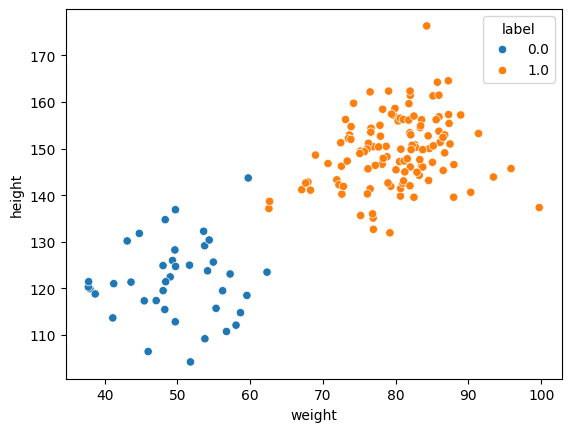

In [5]:
ax = sns.scatterplot(x=df.weight, y=df.height, hue=df.label)

## Select features

In [6]:
# Define X and y
X = df[['height', 'weight']]
y = df['label']

## Separate the training data from the test data

In [7]:
# split into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Choose the model

In [8]:
model = GaussianNB()

## Train the model (fit the model)

In [9]:
model.fit(X_train, y_train)

GaussianNB()

## Predict (classify unknown input sample)

In [10]:
y_pred = model.predict(X_test)

## Evaluate the model

Check the Precision and recall of the system

In [11]:
print(classification_report(y_test, y_pred, target_names=['children', 'adults']))

              precision    recall  f1-score   support

    children       0.91      1.00      0.95        10
      adults       1.00      0.95      0.98        22

    accuracy                           0.97        32
   macro avg       0.95      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



In [17]:
y_pred_task = model.predict([[180,90],[110,20], [130, 60]])
print(y_pred_task)

[1. 0. 0.]
